In [ ]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import os


In [ ]:
input_folder = "data/elo-results"
output_folder = "output"


# Data Cleaning

## Import and clean past Chatbot Arena data

In [33]:
elo_results_list = []

for f in os.listdir(input_folder):
    if f.endswith(".pkl"):
        with open(f"{input_folder}/{f}", "rb") as f:
            data = dict(pickle.load(f))
            keys = data.keys()
            date = datetime.strptime(f.name[-12:-4], "%Y%m%d")
            
            if 'text' in keys:
                df = (
                    data['text']['no_refusal']['leaderboard_table_df']
                    .reset_index()
                    .rename(columns={
                        'rating': 'elo',
                        'index': 'model'
                    })
                )
                
            elif 'leaderiboard_table_df' in keys:
                df = (
                    data['leaderboard_table_df']
                    .reset_index()
                    .rename(columns={
                        'rating': 'elo',
                        'index': 'model'
                    })
                )
                
            elif 'leaderboard_table' in keys:
                table_str = data['leaderboard_table']
   
                rows = table_str.split('\n')[2:]

                parsed_rows = [{
                    'elo': int(row[2]),
                    'model': row[1]
                    } for row in map(lambda x: x.strip('| \n').split('|'), rows) if len(row) == 4]
                
                df = pd.DataFrame(parsed_rows)
                
            df['date'] = date
            elo_results_list.append(df)

elo_results_df = pd.concat(elo_results_list)
elo_results_df.to_csv(f"{output_folder}/elo_results.csv", index=False)


# Analysis

In [ ]:
elo_results_df = pd.read_csv(f"{output_folder}/elo_results.csv")


## Visualizarion Helpers

In [35]:
def view_data(data):
    print(data.head(10))


def visualize_top_rank_distributions(data, top_k = 1):
    top_rank_scores = (
            data.groupby(['date'])['elo']
            .apply(lambda x: x.nlargest(top_k))
            .reset_index(level=1, drop=True)
        )
    
    top_rank_scores.plot(marker='o', title=f"Top {top_k} Elo Ratings Over Time")
    plt.xlabel("Date")
    plt.ylabel("Elo Rating")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


## Estimation Helpers

In [36]:
def estimate_p0():
    
    return None

def estimate_p1():
    
    return None

def estimate_epsilon():
    
    return None


## Forcast Helpers

In [37]:
# Combines all methods to predict the final elo score.
def predict_elo_score():
    
    return None


## Distribution Identification

In [ ]:
view_data(elo_results_df)


                        model          elo   variance  rating_q975  \
0            RWKV-4-Raven-14B   914.615469  30.215045   926.376564   
1                  alpaca-13b   888.655741  25.705916   898.316730   
2      bard-jan-24-gemini-pro  1212.652190  10.701864  1219.369522   
3                  chatglm-6b   866.704866  25.973979   875.888749   
4                 chatglm2-6b   910.729452  46.204860   920.631407   
5                 chatglm3-6b   946.973555  21.547660   956.190364   
6                    claude-1  1166.009445   8.342050  1171.632951   
7                  claude-2.0  1150.192773   9.588814  1156.013589   
8                  claude-2.1  1137.229774   3.050862  1140.759220   
9  claude-3-5-sonnet-20240620  1280.374153   4.076216  1284.808360   

   rating_q025  num_battles  final_ranking        date  
0   903.557065       4444.0          105.0  2024-07-06  
1   879.010494       5471.0          108.0  2024-07-06  
2  1206.623832      11256.0           12.0  2024-07-06  
3

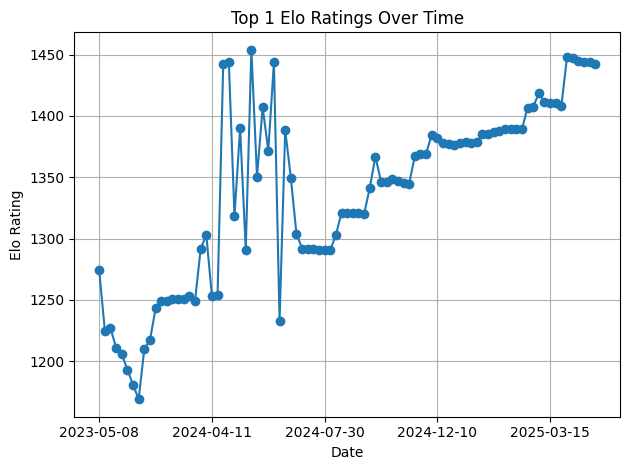

In [ ]:
visualize_top_rank_distributions(elo_results_df)


## Final Predtion Model:

TODO Write out the model structure.

## Epsilon Estimation